#IBM HR Analytics Employee Attrition & Performance
O projeto aborda uma análise de churn (rotatividade de funcionários) em uma base de dados de RH, um problema comum e relevante.
Para esse projeto vamos utilizar as seguintes bibliotecas Pytho: Pandas, Seaborn, Matplotlib e hvplot.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Vou instalar a biblioteca hvplot porque os gráficos são muito bons!

In [4]:
!pip install hvplot
import hvplot.pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 4.2 MB/s eta 0:00:00


O código configura o ambiente para análise e visualização de dados, definindo estilos de gráficos, formatos numéricos e opções de exibição de DataFrames.

In [5]:
sns.set_style('darkgrid')
%matplotlib inline
plt.style.use('tableau-colorblind10')
pd.set_option('display.float_format', "{:.3f}".format)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)


# Carregar conjunto de dados...

In [6]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Análise Exploratória(EDA)

In [7]:
df.shape

(1470, 35)

#Verificando dados ausentes

In [8]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.210,3.154,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.660,0.361,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.000,3.000,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.000,3.000,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.000,3.000,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.000,3.000,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.000,4.000,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


#Análise de Outliers

Um passo importante após o tratamento de dados ausentes é a análise de outliers. Outliers são valores que se distanciam muito do restante dos dados e podem ter um impacto negativo em seus modelos de machine learning.

In [11]:
#Vamos começar identificando as colunas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [12]:
# Agora vamos fazer uma função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Aplicar filtro nos outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [13]:
# Criar um dicionário para armazenar os outliers por coluna
outliers_dict = {col: detect_outliers_iqr(df, col) for col in numeric_cols}

In [14]:
# Contar o número de outliers por coluna
outliers_count = {col: len(outliers) for col, outliers in outliers_dict.items()}

In [15]:
# Filtrar apenas as colunas que possuem outliers
outliers_count_filtered = {col: count for col, count in outliers_count.items() if count > 0}

In [16]:
# Exibir colunas com outliers e a quantidade encontrada
print("Outliers por coluna:")
for column, count in outliers_count_filtered.items():
    print(f"- {column}: {count} outliers")

Outliers por coluna:
- MonthlyIncome: 114 outliers
- NumCompaniesWorked: 52 outliers
- PerformanceRating: 226 outliers
- StockOptionLevel: 85 outliers
- TotalWorkingYears: 63 outliers
- TrainingTimesLastYear: 238 outliers
- YearsAtCompany: 104 outliers
- YearsInCurrentRole: 21 outliers
- YearsSinceLastPromotion: 107 outliers
- YearsWithCurrManager: 14 outliers


In [24]:
import hvplot.pandas
import holoviews as hv

hv.extension('bokeh')  # Ativar visualização interativa

# Lista de colunas com outliers
outlier_cols = ["MonthlyIncome", "NumCompaniesWorked", "PerformanceRating",
                "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
                "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
                "YearsWithCurrManager"]

# Criar os boxplots em um grid layout
boxplots = [df.hvplot.box(y=col, width=300, height=300, title=col) for col in outlier_cols]

# Organizar os gráficos em um grid
grid = hv.Layout(boxplots).cols(4)  # Ajuste o número de colunas conforme necessário

# Exibir os boxplots
grid


:Layout
   .BoxWhisker.I    :BoxWhisker   (MonthlyIncome)
   .BoxWhisker.II   :BoxWhisker   (NumCompaniesWorked)
   .BoxWhisker.III  :BoxWhisker   (PerformanceRating)
   .BoxWhisker.IV   :BoxWhisker   (StockOptionLevel)
   .BoxWhisker.V    :BoxWhisker   (TotalWorkingYears)
   .BoxWhisker.VI   :BoxWhisker   (TrainingTimesLastYear)
   .BoxWhisker.VII  :BoxWhisker   (YearsAtCompany)
   .BoxWhisker.VIII :BoxWhisker   (YearsInCurrentRole)
   .BoxWhisker.IX   :BoxWhisker   (YearsSinceLastPromotion)
   .BoxWhisker.X    :BoxWhisker   (YearsWithCurrManager)

# Observações iniciais sobre os outliers:
**1.MonthlyIncome e TotalWorkingYears têm valores extremos, provavelmente altos salários e carreiras longas. Vamos substituir os outliers pela mediana.

2.PerformanceRating parece ter muitos valores atípicos. Vamos verificar se há notas impossíveis antes de decidir o que fazer.

3.YearsSinceLastPromotion e YearsAtCompany mostram funcionários com muitos anos sem promoção ou na empresa. Esses são insights úteis e não serão removidos.

4.TrainingTimesLastYear pode ter funcionários que fizeram treinamentos demais ou de menos. Vamos verificar se os valores extremos fazem sentido.**

In [ ]:
for col in df.columns:
    print(f"{col}: Número de valores únicos {df[col].nunique()}")
    print("==================================")

Age: Número de valores únicos 43
Attrition: Número de valores únicos 1
BusinessTravel: Número de valores únicos 3
DailyRate: Número de valores únicos 886
Department: Número de valores únicos 3
DistanceFromHome: Número de valores únicos 29
Education: Número de valores únicos 5
EducationField: Número de valores únicos 6
EnvironmentSatisfaction: Número de valores únicos 4
Gender: Número de valores únicos 2
HourlyRate: Número de valores únicos 71
JobInvolvement: Número de valores únicos 4
JobLevel: Número de valores únicos 5
JobRole: Número de valores únicos 9
JobSatisfaction: Número de valores únicos 4
MaritalStatus: Número de valores únicos 3
MonthlyIncome: Número de valores únicos 1238
MonthlyRate: Número de valores únicos 1427
NumCompaniesWorked: Número de valores únicos 10
OverTime: Número de valores únicos 2
PercentSalaryHike: Número de valores únicos 15
PerformanceRating: Número de valores únicos 1
RelationshipSatisfaction: Número de valores únicos 4
StockOptionLevel: Número de valo

Percebemos que **'EmployeeCount', 'Over18' e 'StandardHours'** possuem apenas um valor único, e 'EmployeeNumber' possui 1470 valores únicos. Essas características não são úteis para nós, então vamos remover essas colunas.

In [ ]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'StandardHours'], axis="columns", inplace=True)

KeyError: "['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'StandardHours'] not found in axis"

Verificação de dados ausentes:

In [ ]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


# Características Categóricas

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobRole
Sales Executive              326
Re

ValueError: list.remove(x): x not in list

In [ ]:
len(object_col)

7

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

# Características Numéricas

In [ ]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009.0, Maximum: 16581.0
MonthlyRate : Minimum: 2094, Maximum: 26999


# Visualização de dados

In [21]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [20]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [19]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [18]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [25]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [26]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [ ]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [ ]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300, bins=30)

 *Nota*  
Percebi que as variáveis *EnvironmentSatisfaction, JobSatisfaction, PerformanceRating* e *RelationshipSatisfaction* não têm um grande impacto na determinação da *Attrition* dos funcionários.

In [27]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [ ]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [ ]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [ ]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

#Conclusões:
Os trabalhadores com baixo nível de cargo (JobLevel), renda mensal (MonthlyIncome), anos na empresa (YearsAtCompany) e anos totais de trabalho (TotalWorkingYears) têm maior probabilidade de pedir demissão.

Viagens a trabalho (BusinessTravel): Os funcionários que viajam com frequência têm maior chance de sair do que os outros funcionários.

Departamento (Department): Os funcionários do setor de Pesquisa & Desenvolvimento têm maior probabilidade de permanecer na empresa do que os de outros departamentos.

Área de formação (EducationField): Os trabalhadores com formação em Recursos Humanos e Técnico têm maior probabilidade de sair do que os de outras áreas de educação.

Gênero (Gender): Os homens têm maior probabilidade de pedir demissão.

Cargo (JobRole): Os funcionários nas funções de Técnico de Laboratório, Representante de Vendas e Recursos Humanos têm maior chance de sair do que os de outras posições.

Estado civil (MaritalStatus): Os funcionários solteiros têm maior probabilidade de sair do que os casados e divorciados.

Horas extras (OverTime): Os funcionários que trabalham mais horas têm maior chance de pedir demissão do que os outros.

#Matriz de correlação

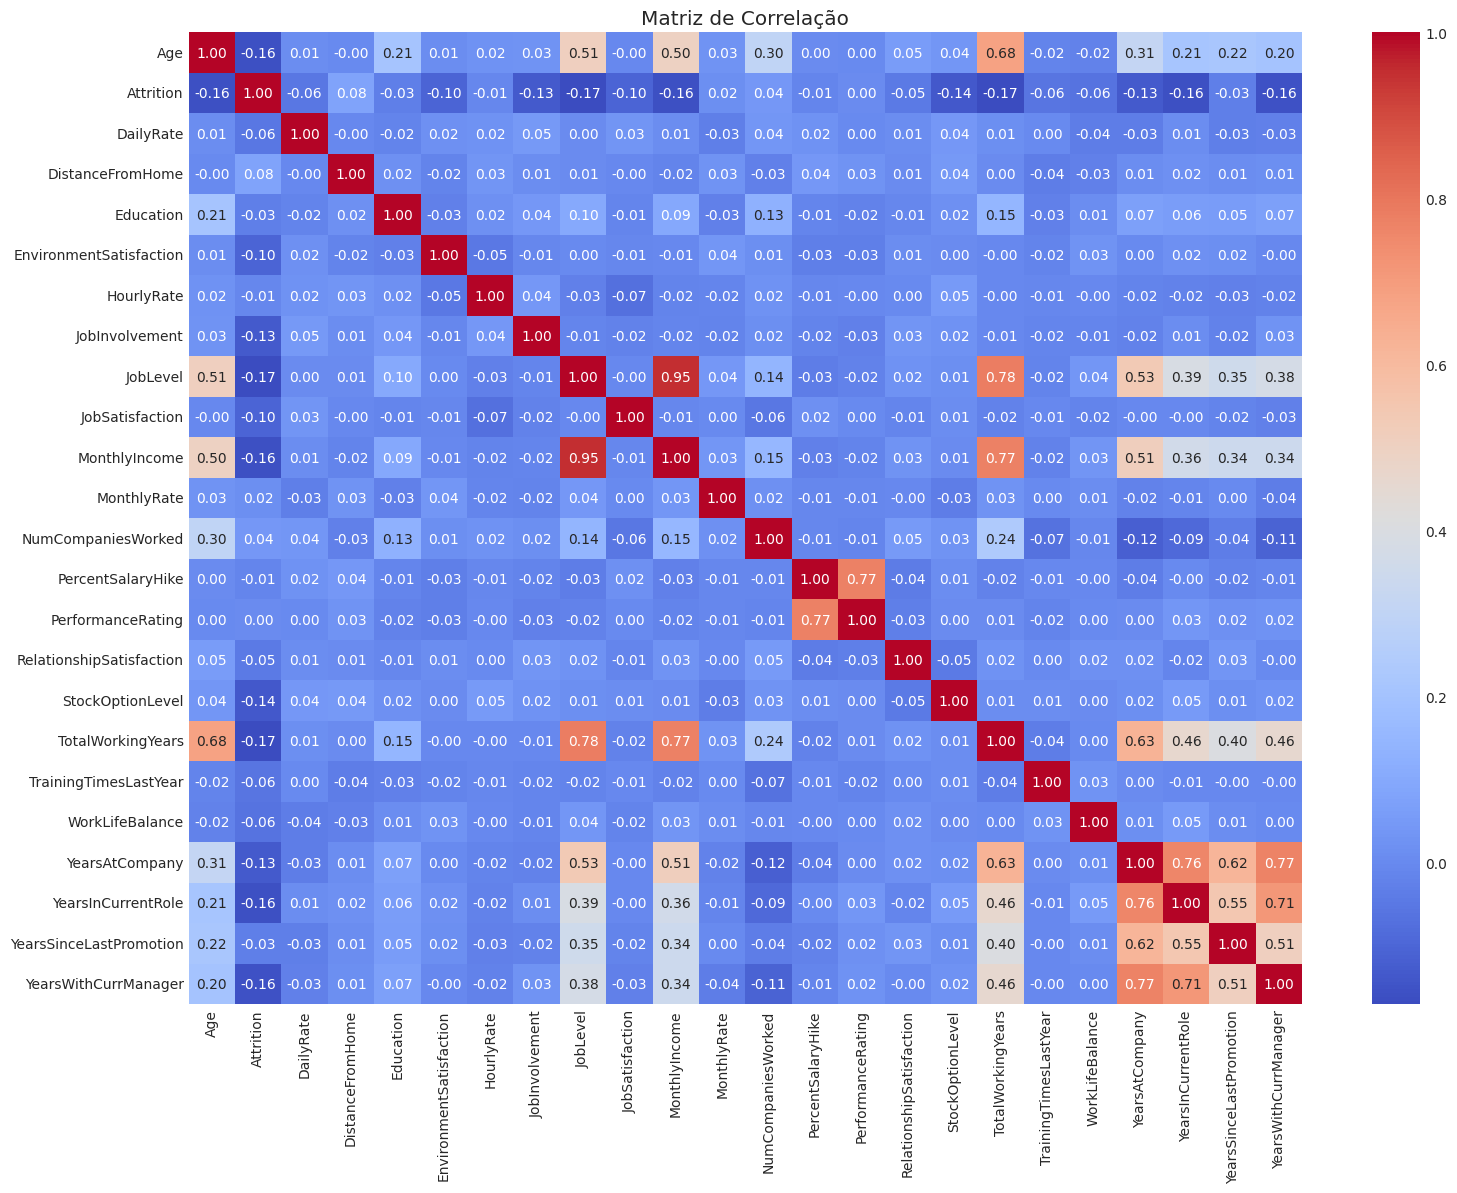

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()